In [1]:
# Import necessary libraries
import pandas as pd

In [2]:
#  Load the dataset
data = pd.read_csv('zoo.csv')
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


# Step 2: Perform EDA

In [4]:
# Check basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB
None


In [5]:
# number of rows and columns
print("Data Shape:", data.shape)

Data Shape: (101, 18)


In [6]:
# column names
print("Data Columns:", data.columns)


Data Columns: Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')


In [7]:
# type of data in each column
print("Data Types:\n", data.dtypes)


Data Types:
 animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object


In [8]:
# Check for missing values
print(data.isnull().sum())

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


In [9]:
# Check the distribution of the target variable ('type')
print(data['type'].value_counts())

type
1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: count, dtype: int64


# Analyze the data using visualizations

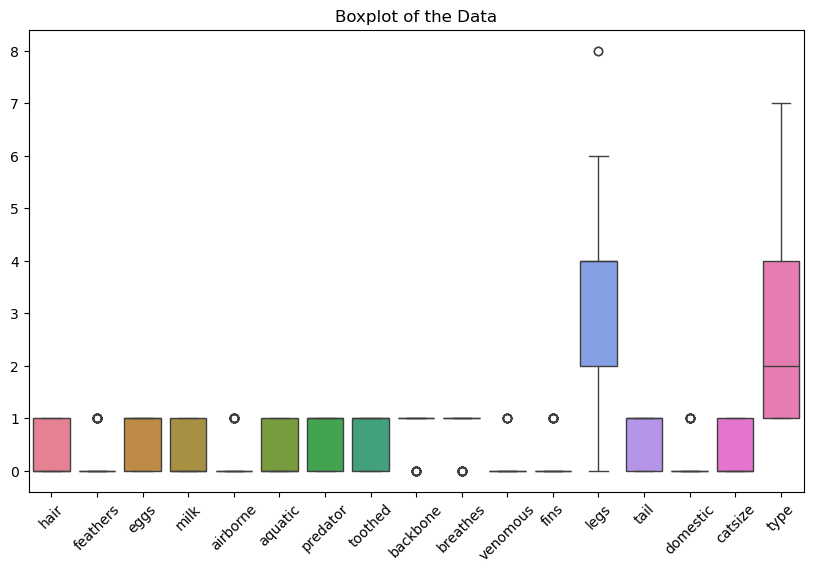

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title("Boxplot of the Data")
plt.xticks(rotation=45)
plt.show()

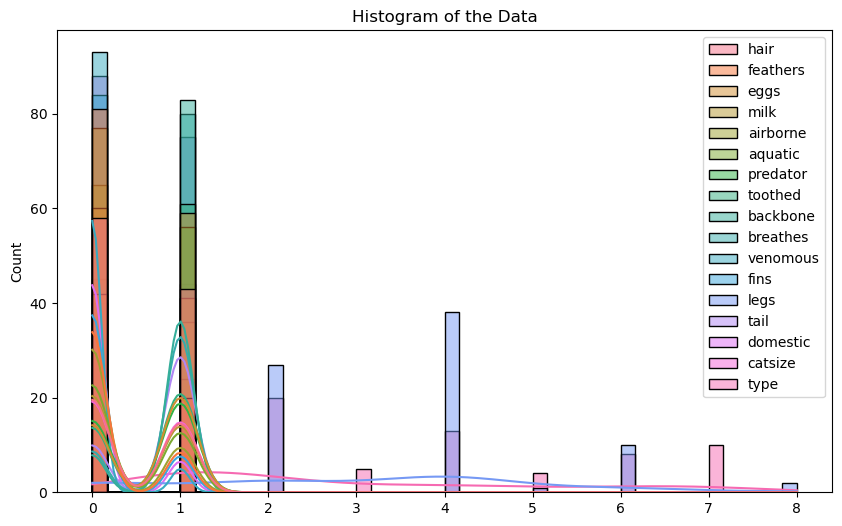

In [12]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=data, kde=True)
plt.title("Histogram of the Data")
plt.show()


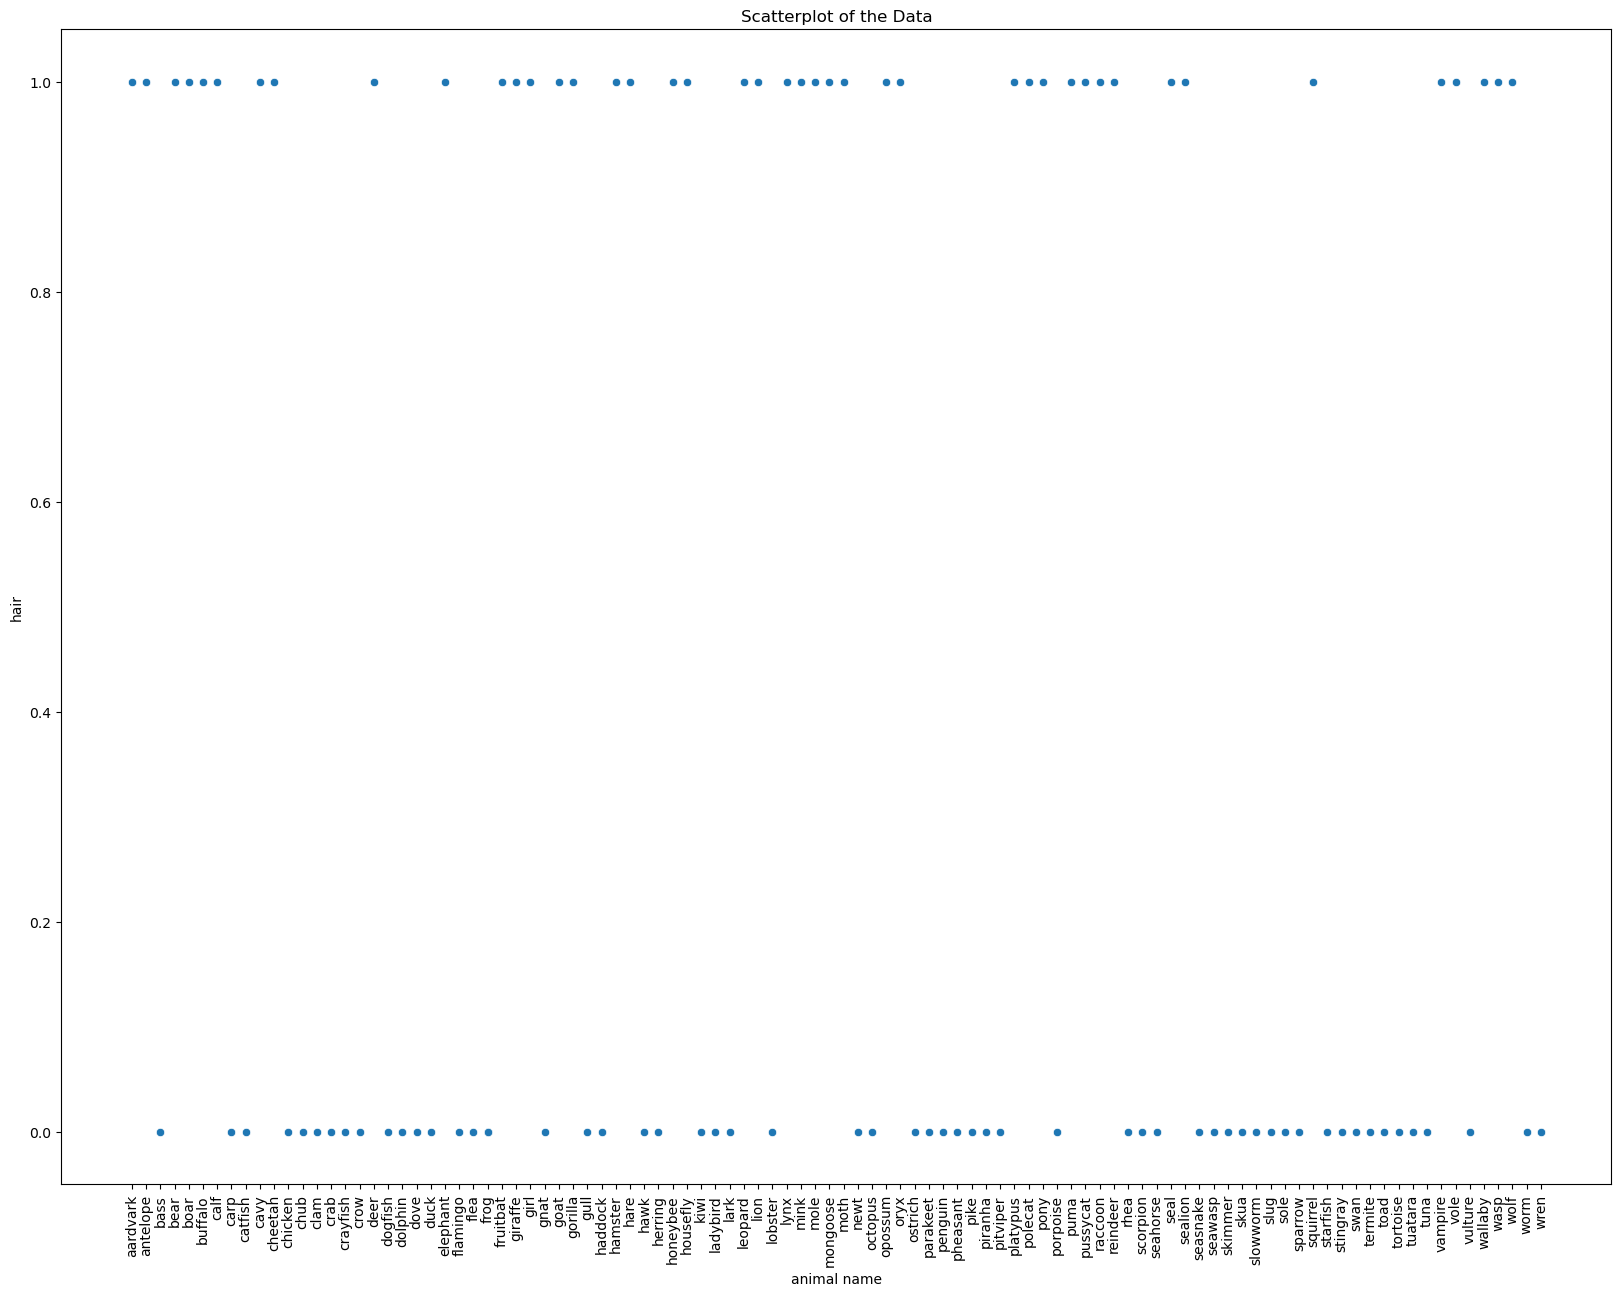

In [13]:
# Scatterplot
plt.figure(figsize=(20, 15))
sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1])
plt.title("Scatterplot of the Data")
plt.xticks(rotation=90)
plt.show()

<Figure size 2000x2000 with 0 Axes>

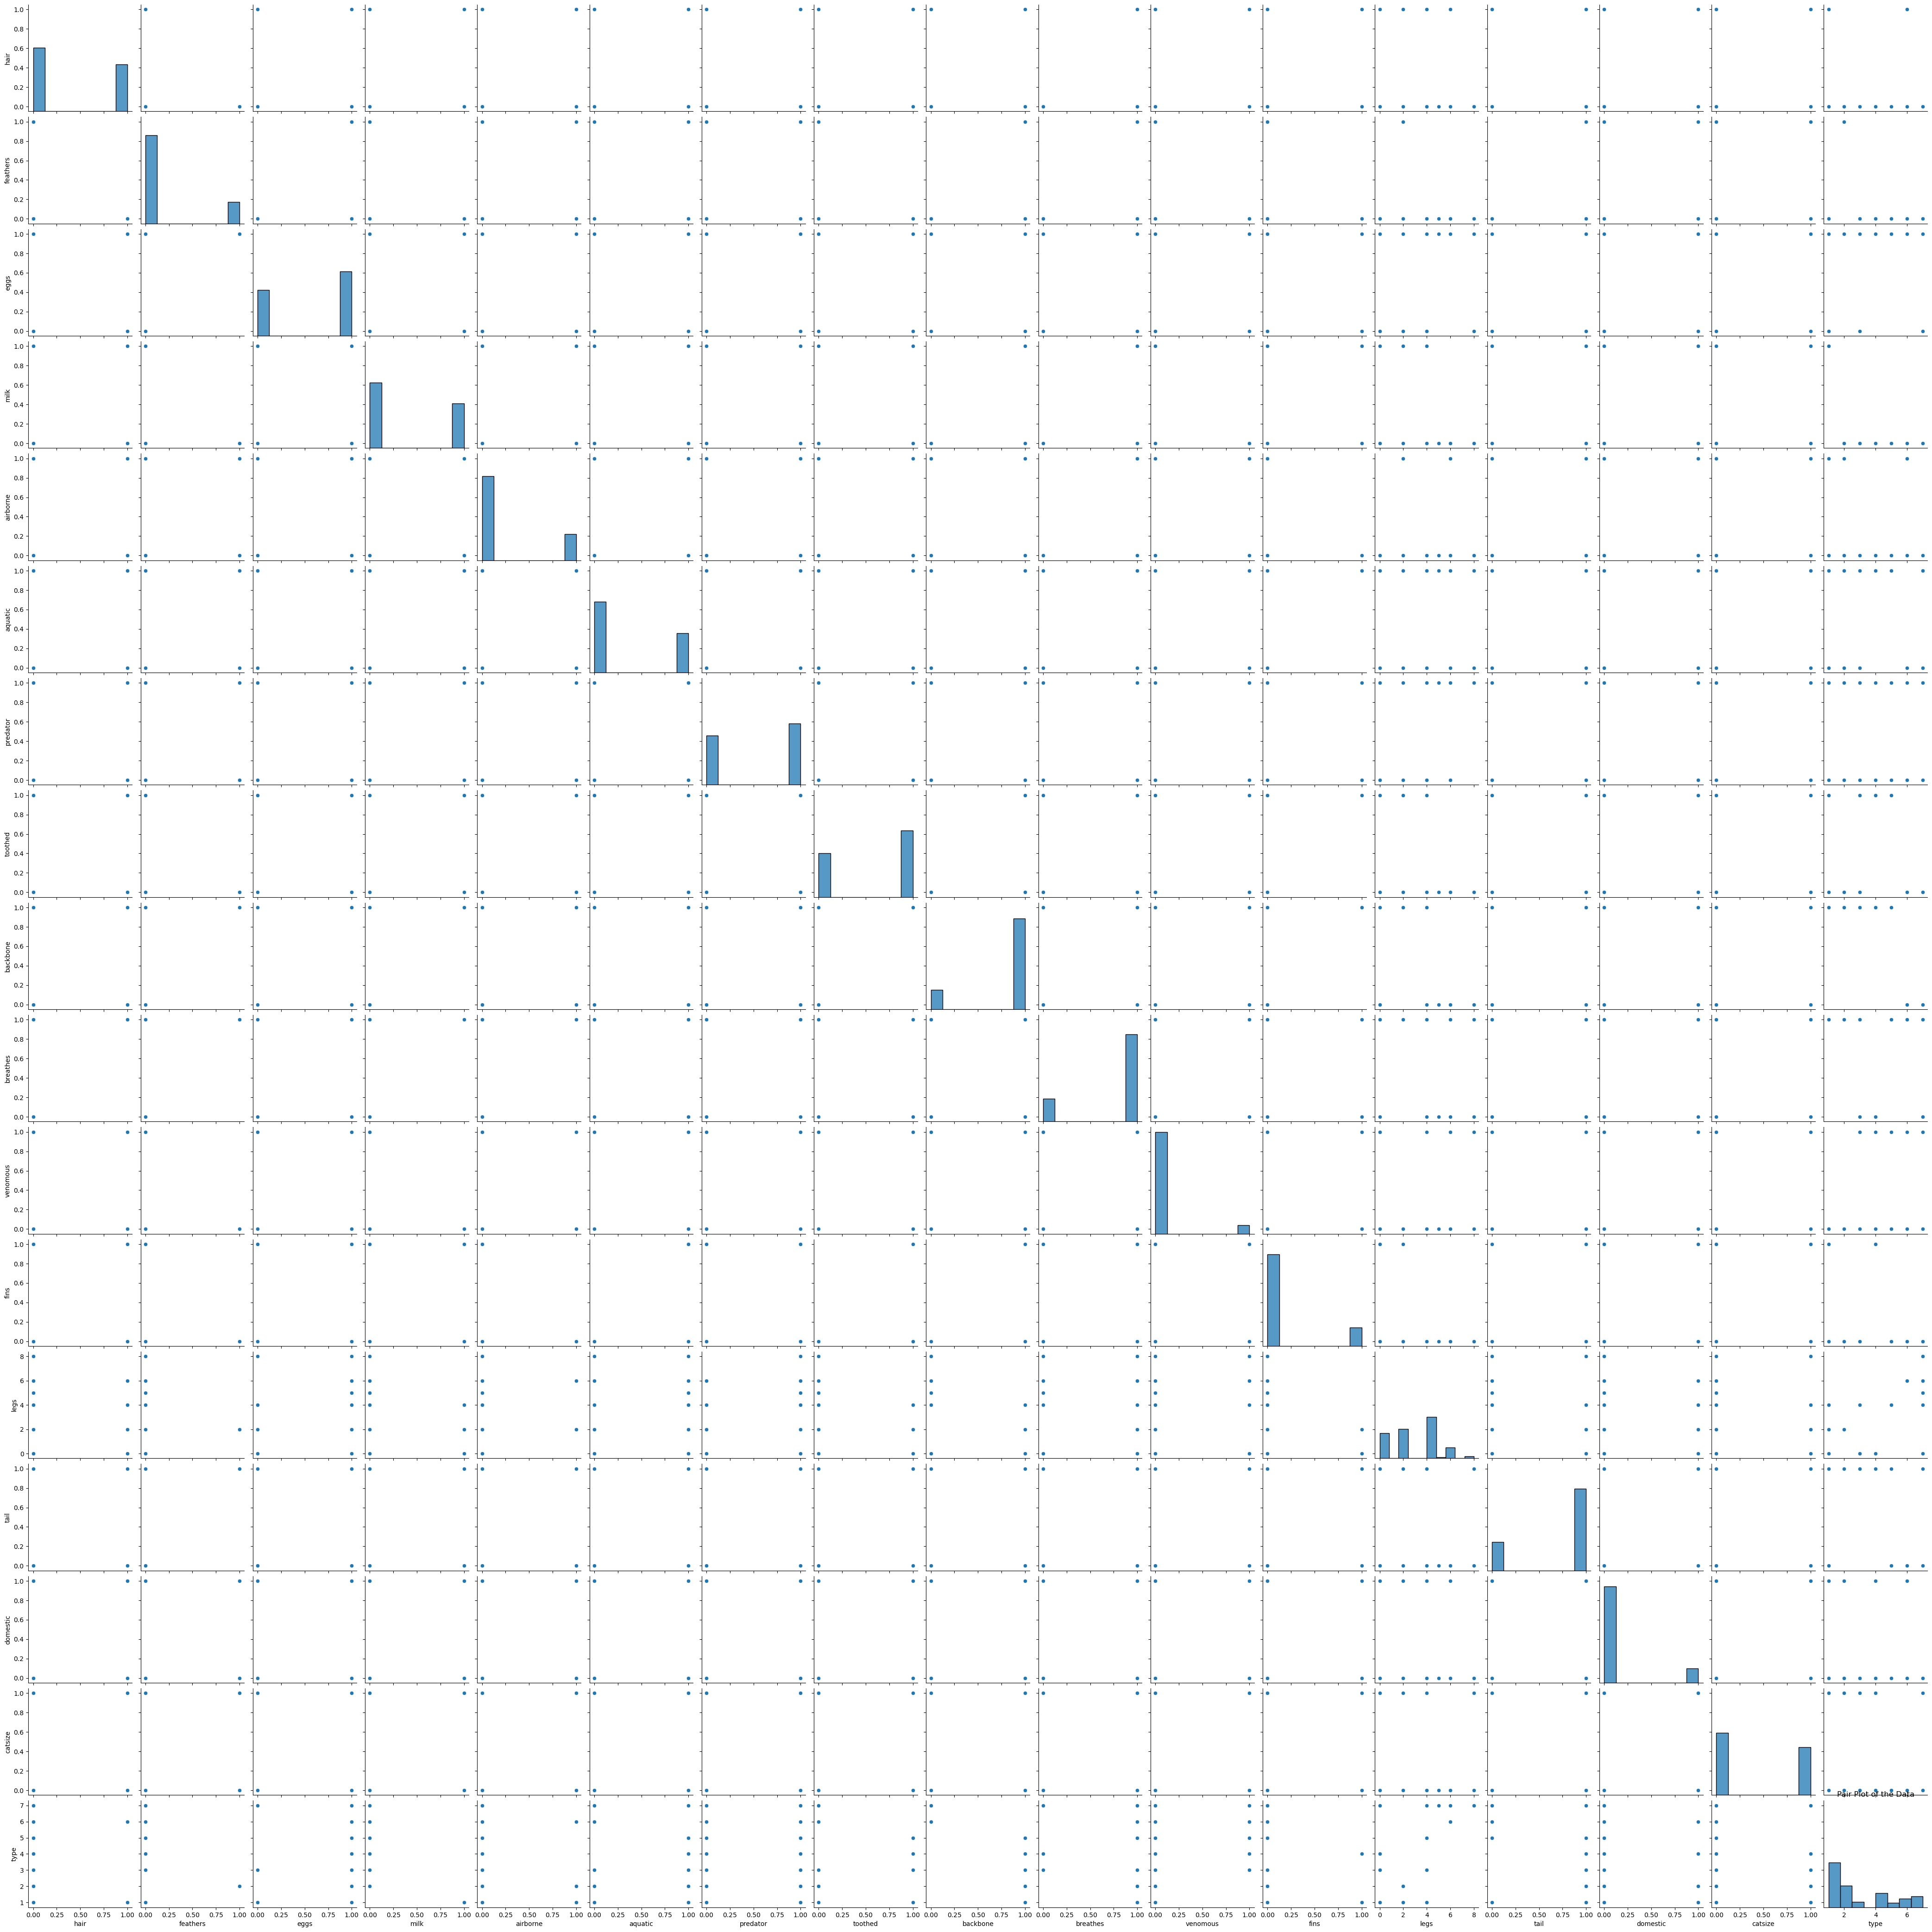

In [14]:
# Pair plot
plt.figure(figsize=(20,20))
sns.pairplot(data=data)
plt.title("Pair Plot of the Data")
plt.show()

# Preprocess the data

In [16]:
# Drop the 'animal name' column as it is not useful for classification
data = data.drop(columns=['animal name'])

# Check for outliers using IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()
print("Outliers:\n", outliers)

# No missing values or significant outliers in this dataset, so no further preprocessing is needed.

Outliers:
 hair         0
feathers    20
eggs         0
milk         0
airborne    24
aquatic      0
predator     0
toothed      0
backbone    18
breathes    21
venomous     8
fins        17
legs         2
tail         0
domestic    13
catsize      0
type         0
dtype: int64


# Split the Dataset into Training and Testing Sets

In [18]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = data.drop(columns=['type'])
y = data['type']

# Split the data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (80, 16)
Testing set size: (21, 16)


# Implement the K-Nearest Neighbors Algorithm

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')  # Using Euclidean distance

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the Classifier's Performance

In [48]:

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Accuracy: 0.9523809523809523
Precision: 0.9166666666666666
Recall: 0.9523809523809523
F1-Score: 0.9319727891156462


C:\Users\lbt99\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [50]:
# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       0.00      0.00      0.00         1
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.95        21
   macro avg       0.82      0.86      0.84        21
weighted avg       0.92      0.95      0.93        21



C:\Users\lbt99\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lbt99\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lbt99\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Choose an Appropriate Value for K

In [24]:
# Use cross-validation to find the optimal value of K
from sklearn.model_selection import cross_val_score

k_values = range(1, 21)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())



C:\Users\lbt99\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\lbt99\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\lbt99\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\lbt99\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\lbt99\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\lbt99\anaconda3\Lib\s

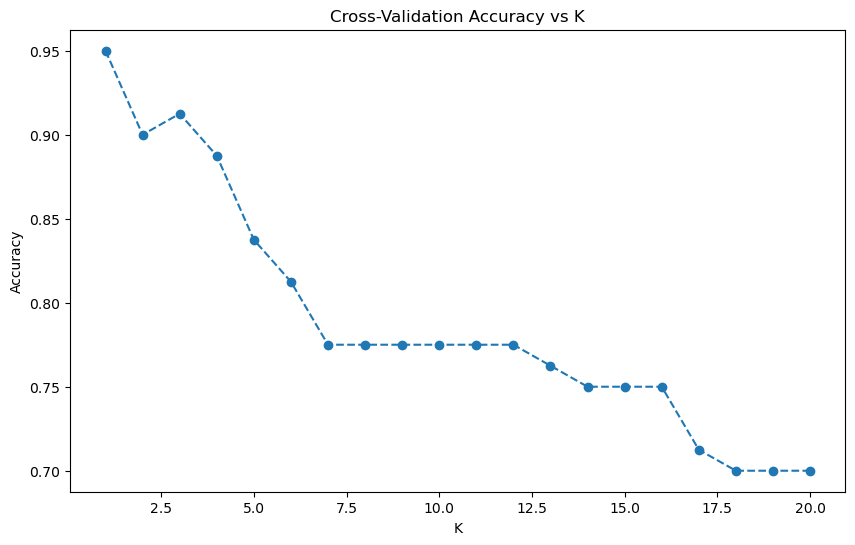

Optimal K: 1


In [25]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o', linestyle='--')
plt.title("Cross-Validation Accuracy vs K")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()

# Choose the best K
best_k = k_values[cv_scores.index(max(cv_scores))]
print("Optimal K:", best_k)

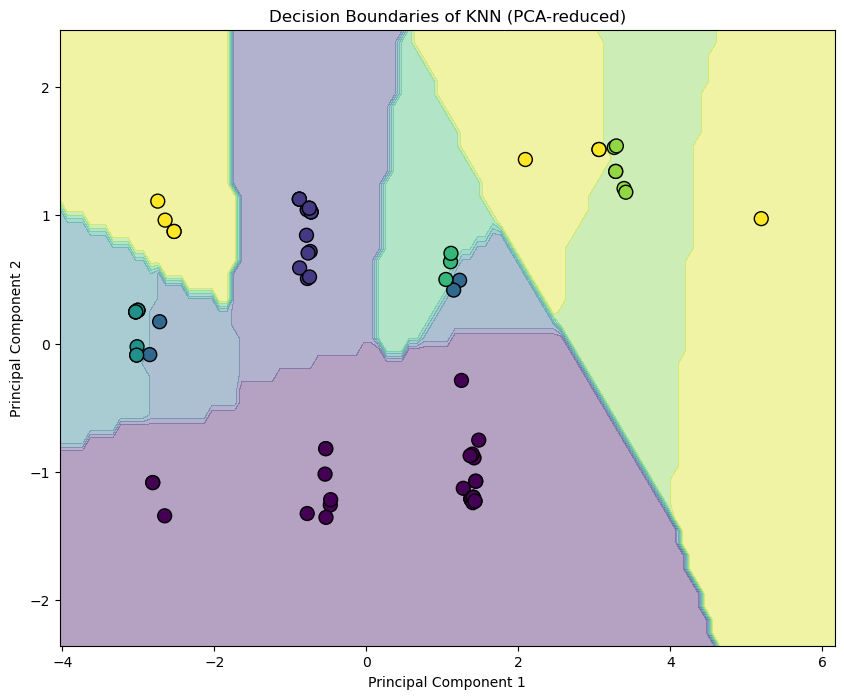

In [26]:
import numpy as np

# Reduce dimensions using PCA for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train KNN on reduced dimensions
knn_pca = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
knn_pca.fit(X_train_pca, y_train)

# Create a meshgrid for decision boundaries
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict on the meshgrid
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolor='k', s=100, cmap='viridis')
plt.title("Decision Boundaries of KNN (PCA-reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Interview Questions

# 1.Key hyperparameters in KNN

K (Number of neighbors): Determines how many nearest neighbors influence the prediction.

Distance metric: Defines how distances are measured (e.g., Euclidean, Manhattan).

Weight function: Determines neighbor influence (uniform or distance-based).

Search algorithm: Brute force, KD-Tree, or Ball-Tree for neighbor searching.

Leaf size: Affects tree-based search efficiency.

Minkowski power parameter (p): Controls the distance formula (p=1 for Manhattan, p=2 for Euclidean).

# 2.Distance metrics in KNN:

Euclidean Distance (default, straight-line distance)

Manhattan Distance (sum of absolute differences)

Minkowski Distance (generalized form)

Chebyshev Distance (max absolute difference)

Hamming Distance (for categorical data)

Mahalanobis Distance (accounts for correlations)

Cosine Similarity (for high-dimensional data)